# Bitcoin data analysis
## Yepeng Ding
### 12/13/2019

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats
import statsmodels.tsa.api as smt
from arch import arch_model

### Import data

In [2]:
data = pd.read_csv('./data/BTC_USD_2013-10-01_2019-12-15-CoinDesk.csv')
data_date = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data_cp = data['Closing Price (USD)']
data_size = len(data_cp)
print(data_cp.describe())

count     2257.000000
mean      3207.038487
std       3781.376050
min        108.584830
25%        421.424000
50%        805.796250
75%       6280.310107
max      19166.978740
Name: Closing Price (USD), dtype: float64


### Plot daily index

/Users/michaeltei/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


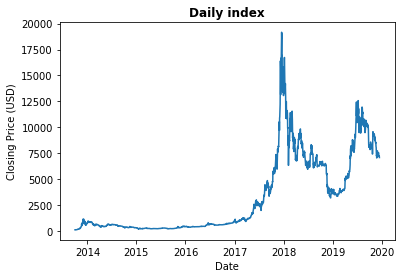

In [3]:
plt.title("Daily index", weight='bold')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.plot(data_date, data_cp)
plt.show()

### Calculate price return

In [4]:
returns = data_cp.pct_change().dropna()
print(returns.describe())
print('Skewness', stats.skew(returns))
print('Kurtosis', stats.kurtosis(returns))
print('Jarque–Bera test', stats.jarque_bera(returns))

count    2256.000000
mean        0.002751
std         0.043725
min        -0.247595
25%        -0.013038
50%         0.001464
75%         0.019386
max         0.358493
Name: Closing Price (USD), dtype: float64
Skewness 0.22527488169104032
Kurtosis 6.562641905912875
Jarque–Bera test (4067.498804205579, 0.0)


### Plot price return

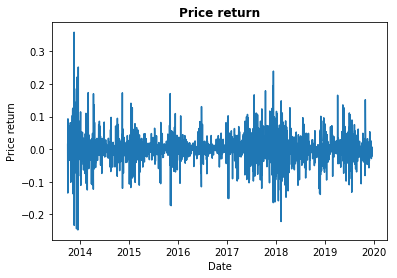

In [5]:
plt.title("Price return", weight='bold')
plt.xlabel('Date')
plt.ylabel('Price return')
plt.plot(data_date[1:], returns)
plt.show()

### Calculate squared price return

In [6]:
squared_returns = returns ** 2
print(squared_returns.describe())

count    2.256000e+03
mean     1.918581e-03
std      5.616890e-03
min      4.611872e-11
25%      3.608402e-05
50%      2.653445e-04
75%      1.399284e-03
max      1.285173e-01
Name: Closing Price (USD), dtype: float64


### Plot squared price return

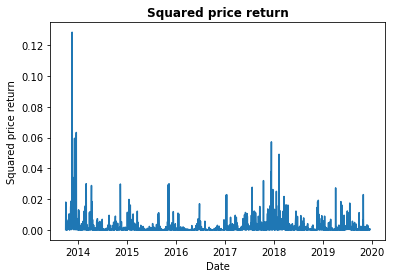

In [7]:
plt.title("Squared price return", weight='bold')
plt.xlabel('Date')
plt.ylabel('Squared price return')
plt.plot(data_date[1:], squared_returns)
plt.show()

### Calculate autocorrelation of price return

In [8]:
returns_acf = pd.DataFrame(smt.stattools.acf(returns,nlags=len(returns)))
print(returns_acf.describe())

                 0
count  2256.000000
mean      0.000222
std       0.026211
min      -0.061034
25%      -0.009463
50%      -0.000419
75%       0.008988
max       1.000000


### Plot autocorrelation of price return

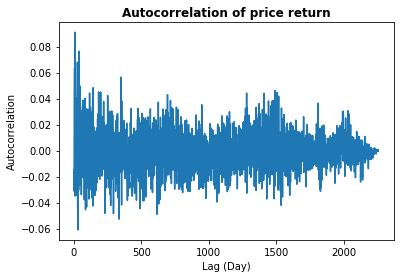

In [9]:
plt.title("Autocorrelation of price return", weight='bold')
plt.xlabel('Lag (Day)')
plt.ylabel('Autocorrelation')
plt.plot(returns_acf[1:])
plt.show()

### Calculate autocorrelation of squared price return

In [10]:
squared_returns_acf = pd.DataFrame(smt.stattools.acf(squared_returns,nlags=len(squared_returns)))
print(squared_returns_acf.describe())

                 0
count  2256.000000
mean      0.000222
std       0.032938
min      -0.037502
25%      -0.014305
50%      -0.006012
75%       0.005579
max       1.000000


### Plot autocorrelation of squared price return

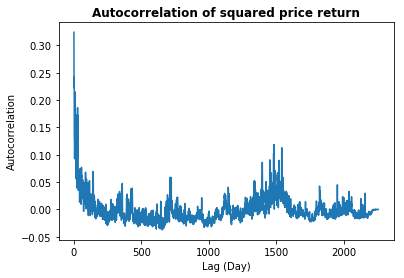

In [11]:
plt.title("Autocorrelation of squared price return", weight='bold')
plt.xlabel('Lag (Day)')
plt.ylabel('Autocorrelation')
plt.plot(squared_returns_acf[1:])
plt.show()

### GARCH model of price return

In [12]:
garch = arch_model(returns * 100)
garch_result = garch.fit()
print(garch_result.summary())
print('(alpha+beta) = ', garch_result.params['alpha[1]'] + garch_result.params['beta[1]'])

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6117.3980754128615
Iteration:      2,   Func. Count:     15,   Neg. LLF: 6112.571892634507
Iteration:      3,   Func. Count:     23,   Neg. LLF: 6108.356807978672
Iteration:      4,   Func. Count:     31,   Neg. LLF: 6100.603068244179
Iteration:      5,   Func. Count:     39,   Neg. LLF: 6100.367823875818
Iteration:      6,   Func. Count:     46,   Neg. LLF: 6100.264378685646
Iteration:      7,   Func. Count:     52,   Neg. LLF: 6099.930045573386
Iteration:      8,   Func. Count:     58,   Neg. LLF: 6099.9155863071655
Iteration:      9,   Func. Count:     64,   Neg. LLF: 6099.915210196053
Iteration:     10,   Func. Count:     70,   Neg. LLF: 6099.915133245527
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6099.915133245989
            Iterations: 10
            Function evaluations: 70
            Gradient evaluations: 10
                      Constant Mean - GARCH Model Results           

### Visualize the standardized residuals and conditional volatility

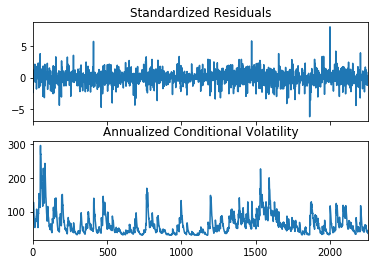

In [13]:
garch_fig = garch_result.plot(annualize='D')

### GJR-GARCH model of price return

In [14]:
gjr = arch_model(returns * 100, p=1, o=1, q=1)
gjr_result = gjr.fit(disp='off')
print(gjr_result.summary())
print('(1-alpha-beta-0.5*gamma) = ', 1 - gjr_result.params['alpha[1]'] - gjr_result.params['beta[1]'] - 0.5 * gjr_result.params['gamma[1]'])

                    Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:     Closing Price (USD)   R-squared:                      -0.001
Mean Model:              Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                   GJR-GARCH   Log-Likelihood:               -6099.46
Distribution:                   Normal   AIC:                           12208.9
Method:             Maximum Likelihood   BIC:                           12237.5
                                         No. Observations:                 2256
Date:                 Thu, Dec 19 2019   Df Residuals:                     2251
Time:                         17:20:04   Df Model:                            5
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1078  5.772e-02      1.867  6.192e-

### Calculate frequency of price return

In [15]:
# Adjust decimal point
precision = 3
returns = pd.DataFrame(np.around(returns, decimals=precision))

returns_frequency = returns.iloc[:,0].value_counts()

# Sort by the index
returns_frequency.sort_index(inplace=True)

print(returns_frequency.describe())

count    262.000000
mean       8.610687
std       11.722901
min        1.000000
25%        1.000000
50%        3.000000
75%       10.000000
max       55.000000
Name: Closing Price (USD), dtype: float64


### Plot frequency of price return

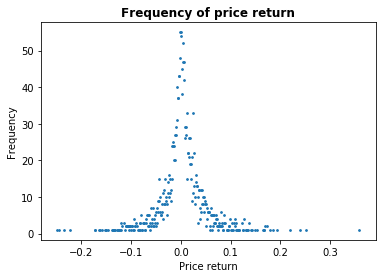

In [16]:
plt.title("Frequency of price return", weight='bold')
plt.xlabel('Price return')
plt.ylabel('Frequency')
plt.scatter(returns_frequency.index, returns_frequency, s=3)
plt.show()

### Calculate probability density of price return

In [17]:
returns_pdf = returns_frequency / sum(returns_frequency)
print(returns_pdf.describe())

count    262.000000
mean       0.003817
std        0.005196
min        0.000443
25%        0.000443
50%        0.001330
75%        0.004433
max        0.024379
Name: Closing Price (USD), dtype: float64


### Plot probability distribution of price return

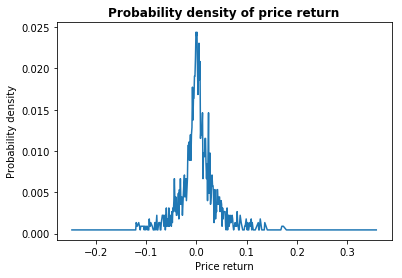

In [18]:
plt.title("Probability density of price return", weight='bold')
plt.xlabel('Price return')
plt.ylabel('Probability density')
plt.plot(returns_pdf.index, returns_pdf)
plt.show()

### Normalize probability density of price return

In [19]:
interval_length = 10 ** (-precision)
returns_pdf_norm = returns_pdf / sum(returns_pdf * interval_length)
print(returns_pdf_norm.describe())

count    262.000000
mean       3.816794
std        5.196321
min        0.443262
25%        0.443262
50%        1.329787
75%        4.432624
max       24.379433
Name: Closing Price (USD), dtype: float64


### Plot probability density normalization of price return

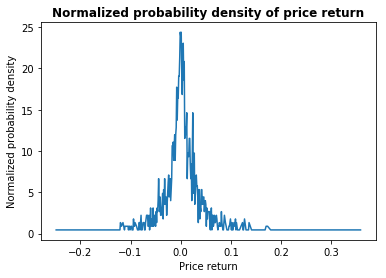

In [20]:
plt.title("Normalized probability density of price return", weight='bold')
plt.xlabel('Price return')
plt.ylabel('Normalized probability density')
plt.plot(returns_pdf_norm.index, returns_pdf_norm)
plt.show()
